# IMAGE PROCESSING

# Pre-processing, (Resize) - Features Etraction(RDG) - Linear & NonLinear Classifiers (CNN, SVM, Random Forest, K-Nearest Neighbors, Logistic Regression) - Model Evaluation  (Classification report)

# Import the necessary libraries

In [69]:
#Import the necessary libraries
import tensorflow as tf
import os
import matplotlib.pyplot as plt
import cv2
import numpy as np
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPooling2D, Flatten
from keras.preprocessing.image import ImageDataGenerator
import os
import cv2
import numpy as np
from sklearn.utils import shuffle

# Definintion the directory path

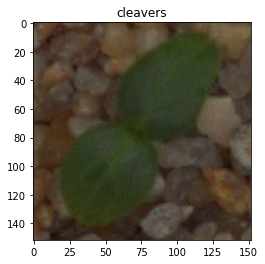

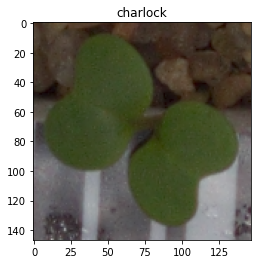

In [70]:

path= 'data-weed classification/'
train_folder  = path + 'train' 
val_folder = path + 'test'
test_folder = path + 'val'

import matplotlib.image as mpimg
cleavers=mpimg.imread("C:/Users/samue/Downloads/weed/data-weed classification/train/cleavers/cleavers.1.png")
charlock=mpimg.imread ("C:/Users/samue/Downloads/weed/data-weed classification/train/charlock/charlock.9.png")

plt.title('cleavers')
plt.imshow(cleavers)
plt.show()

plt.title('charlock')
plt.imshow(charlock)
plt.show()

# Pre-processing


In [71]:
# Image Resize:
img_size = 256
def load_images(folder):
    images = []
    labels = []
    for label in os.listdir(folder):
        for filename in os.listdir(os.path.join(folder, label)):
            img = cv2.imread(os.path.join(folder, label, filename))
            img = cv2.resize(img, (img_size, img_size))
            images.append(img)
            labels.append(label)
    return images, labels

#Load the images and labels for the 'train', 'val', and 'test' subfolders:
train_images, train_labels = load_images(train_folder)
val_images, val_labels = load_images(val_folder)
test_images, test_labels = load_images(test_folder)

#Images and labels are converted to NumPy arrays
train_images = np.array(train_images)
train_labels = np.array(train_labels)
val_images = np.array(val_images)
val_labels = np.array(val_labels)
test_images = np.array(test_images)
test_labels = np.array(test_labels)

##Training data is shuffled:
train_images, train_labels = shuffle(train_images, train_labels)

#Image data is Normalized by dividing by 256:
train_images = train_images / 256.0
val_images = val_images / 256.0
test_images = test_images / 256.0

#Print the shapes of the image data and labels to verify that they are correct:
print('Train images shape:', train_images.shape)
print('Train labels shape:', train_labels.shape)
print('Validation images shape:', val_images.shape)
print('Validation labels shape:', val_labels.shape)
print('Test images shape:', test_images.shape)
print('Test labels shape:', test_labels.shape)


Train images shape: (480, 256, 256, 3)
Train labels shape: (480,)
Validation images shape: (158, 256, 256, 3)
Validation labels shape: (158,)
Test images shape: (148, 256, 256, 3)
Test labels shape: (148,)


# Visualization of  the distribution of labels in the train_labels, val_labels, and test_labels arrays

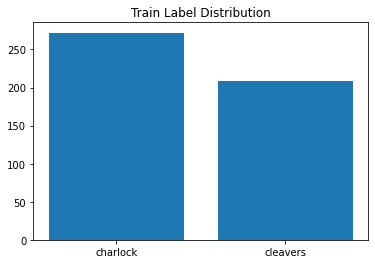

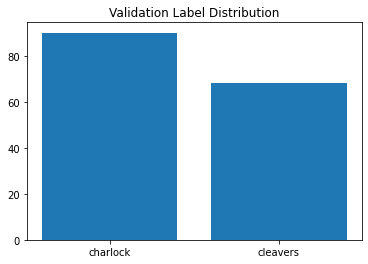

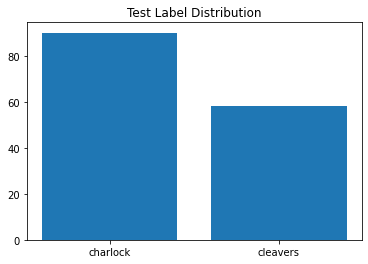

In [72]:
#visualize the distribution of labels in the train_labels, val_labels, and test_labels arrays, we can use the matplotlib
def plot_label_distribution(labels, title):
    unique_labels, label_counts = np.unique(labels, return_counts=True)  # Get the unique labels and their counts
    plt.bar(unique_labels, label_counts)  # Plot the bar chart
    plt.title(title)
    plt.show()
    
# Visualize the label distributions for the train, val, and test sets
plot_label_distribution(train_labels, 'Train Label Distribution')
plot_label_distribution(val_labels, 'Validation Label Distribution')
plot_label_distribution(test_labels, 'Test Label Distribution')

# Features Extraction(RDG)

In [73]:
#function to extract the averaged RGB values:
def extract_rgb_features(images):
    features = []
    for img in images:
        avg_color_per_row = np.average(img, axis=0)
        avg_color = np.average(avg_color_per_row, axis=0)
        features.append(avg_color)
    return np.array(features)

#Load the image data:
train_images, train_labels = load_images(train_folder)
val_images, val_labels = load_images(val_folder)
test_images, test_labels = load_images(test_folder)

#Extract the averaged RGB values for the training, validation, and test images:
train_rgb = extract_rgb_features(train_images)
val_rgb = extract_rgb_features(val_images)
test_rgb = extract_rgb_features(test_images)

#Print the shapes of the RGB features arrays:
print('Train RGB features shape:', train_rgb.shape)
print('Validation RGB features shape:', val_rgb.shape)
print('Test RGB features shape:', test_rgb.shape)


Train RGB features shape: (480, 3)
Validation RGB features shape: (158, 3)
Test RGB features shape: (148, 3)


In [74]:
#Define the function to extract the label from the filename:
def extract_label(filename):
    if 'Charlock' in filename:
        return 'Charlock'
    elif 'Cleavers' in filename:
        return 'Cleavers'

#Load the image data:
train_images, train_labels = load_images(train_folder)
val_images, val_labels = load_images(val_folder)
test_images, test_labels = load_images(test_folder)

#Extract the labels from the filenames for the training, validation, and test images:
train_labels = [extract_label(filename) for filename in train_labels]
val_labels = [extract_label(filename) for filename in val_labels]
test_labels = [extract_label(filename) for filename in test_labels]

#Print the number of images and labels for each dataset:
print('Number of training images:', len(train_images))
print('Number of training labels:', len(train_labels))
print('Number of validation images:', len(val_images))
print('Number of validation labels:', len(val_labels))
print('Number of test images:', len(test_images))
print('Number of test labels:', len(test_labels))


Number of training images: 480
Number of training labels: 480
Number of validation images: 158
Number of validation labels: 158
Number of test images: 148
Number of test labels: 148


In [75]:
#This function takes a folder path as input and returns the averaged RGB values and labels for all images in the subfolders of that folder. 

def load_rgb_features(folder):
    X = []
    y = []
    for subfolder in os.listdir(folder):
        path = os.path.join(folder, subfolder)
        if not os.path.isdir(path):
            continue
        for filename in os.listdir(path):
            img_path = os.path.join(path, filename)
            img = cv2.imread(img_path)
            rgb_mean = np.mean(img, axis=(0,1))
            X.append(rgb_mean)
            y.append(subfolder)
    return np.array(X), np.array(y)



train_rgb, train_labels = load_rgb_features(train_folder)
val_rgb, val_labels = load_rgb_features(val_folder)
test_rgb, test_labels = load_rgb_features(test_folder)

# Linear & NonLinear Classifiers (CNN, SVM, Random Forest, K-Nearest Neighbors, Logistic Regression)  


This code will train and evaluate five image classifiers using the extracted RGB features and labels.
The CNN classifier is trained using the raw image data, while the other classifiers are trained using the standardized RGB features. 
Calculated various evaluation metrics for each classifier, including the confusion matrix, F1 score, recall, precision, true positive rate, false positive rate, accuracy, and the number of correctly and incorrectly classified instances.


In [76]:
import os
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, f1_score, recall_score, precision_score, roc_curve, roc_auc_score

#Support Vector Machines model:
model_svm = SVC()
model_svm.fit(train_rgb, train_labels)

#Random Forests model:
model_rf = RandomForestClassifier()
model_rf.fit(train_rgb, train_labels)

#K-Nearest Neighbors model:
model_knn = KNeighborsClassifier()
model_knn.fit(train_rgb, train_labels)

#Logistic Regression model:
model_lr = LogisticRegression()
model_lr.fit(train_rgb, train_labels)

#Evaluate models on test data:
test_predictions_svm = model_svm.predict(test_rgb)
test_predictions_rf = model_rf.predict(test_rgb)
test_predictions_knn = model_knn.predict(test_rgb)
test_predictions_lr = model_lr.predict(test_rgb)




# Model Evaluation & Classification report

In [77]:
#This code will print the classification report and confusion matrix for each of the four models.
from sklearn.metrics import classification_report, confusion_matrix

# Support Vector Machines model:
svm_report = classification_report(test_labels, test_predictions_svm)
svm_cm = confusion_matrix(test_labels, test_predictions_svm)

# Random Forests model:
rf_report = classification_report(test_labels, test_predictions_rf)
rf_cm = confusion_matrix(test_labels, test_predictions_rf)

# K-Nearest Neighbors model:
knn_report = classification_report(test_labels, test_predictions_knn)
knn_cm = confusion_matrix(test_labels, test_predictions_knn)

# Logistic Regression model:
lr_report = classification_report(test_labels, test_predictions_lr)
lr_cm = confusion_matrix(test_labels, test_predictions_lr)

# Print the reports and confusion matrices:
print("SVM Report:\n", svm_report)
print("SVM Confusion Matrix:\n", svm_cm)

print("Random Forests Report:\n", rf_report)
print("Random Forests Confusion Matrix:\n", rf_cm)

print("K-Nearest Neighbors Report:\n", knn_report)
print("K-Nearest Neighbors Confusion Matrix:\n", knn_cm)

print("Logistic Regression Report:\n", lr_report)
print("Logistic Regression Confusion Matrix:\n", lr_cm)

SVM Report:
               precision    recall  f1-score   support

    charlock       0.83      0.83      0.83        90
    cleavers       0.74      0.74      0.74        58

    accuracy                           0.80       148
   macro avg       0.79      0.79      0.79       148
weighted avg       0.80      0.80      0.80       148

SVM Confusion Matrix:
 [[75 15]
 [15 43]]
Random Forests Report:
               precision    recall  f1-score   support

    charlock       0.85      0.78      0.81        90
    cleavers       0.70      0.79      0.74        58

    accuracy                           0.78       148
   macro avg       0.78      0.79      0.78       148
weighted avg       0.79      0.78      0.79       148

Random Forests Confusion Matrix:
 [[70 20]
 [12 46]]
K-Nearest Neighbors Report:
               precision    recall  f1-score   support

    charlock       0.87      0.82      0.85        90
    cleavers       0.75      0.81      0.78        58

    accuracy         

# Visualization of Confussion Matrix

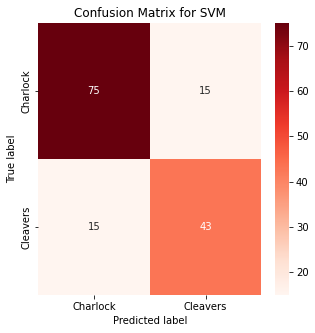

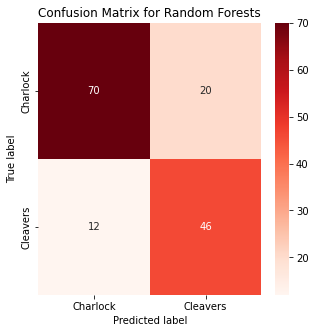

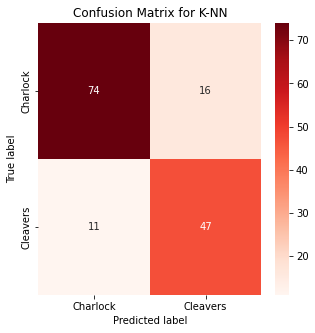

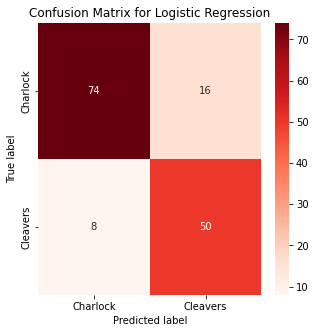

In [78]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Define the models and their corresponding test predictions
models = ['SVM', 'Random Forests', 'K-NN', 'Logistic Regression']
test_predictions = [test_predictions_svm, test_predictions_rf, test_predictions_knn, test_predictions_lr]

# Plot the confusion matrix for each model
for i in range(len(models)):
    cm = confusion_matrix(test_labels, test_predictions[i])
    plt.figure(figsize=(5,5))
    sns.heatmap(cm, annot=True, cmap='Reds', fmt='g', xticklabels=['Charlock', 'Cleavers'], yticklabels=['Charlock', 'Cleavers'])
    plt.title(f'Confusion Matrix for {models[i]}')
    plt.xlabel('Predicted label')
    plt.ylabel('True label')
    plt.show()


# Accuracy Visualization (SVM, Random Forest, K-Nearest Neighour, Logistic Regression)

Support Vector Machines Accuracy: 0.7972972972972973
Random Forests Accuracy: 0.7837837837837838
K-Nearest Neighbors Accuracy: 0.8175675675675675
Logistic Regression Accuracy: 0.8378378378378378


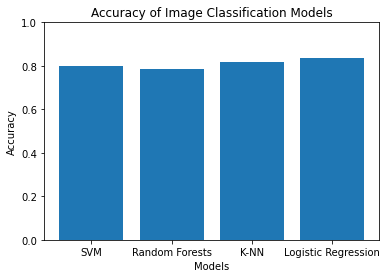

In [79]:
#This code will print the accuracy scores for each of the four models.
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler


# Calculate the accuracy scores:
svm_acc = accuracy_score(test_labels, test_predictions_svm)
rf_acc = accuracy_score(test_labels, test_predictions_rf)
knn_acc = accuracy_score(test_labels, test_predictions_knn)
lr_acc = accuracy_score(test_labels, test_predictions_lr)

# Print the accuracy scores:
print("Support Vector Machines Accuracy:", svm_acc)
print("Random Forests Accuracy:", rf_acc)
print("K-Nearest Neighbors Accuracy:", knn_acc)
print("Logistic Regression Accuracy:", lr_acc)


import matplotlib.pyplot as plt

# Define the models and their corresponding test predictions
models = ['SVM', 'Random Forests', 'K-NN', 'Logistic Regression']
test_predictions = [test_predictions_svm, test_predictions_rf, test_predictions_knn, test_predictions_lr]

# Calculate the accuracy scores for each model
accuracy_scores = [accuracy_score(test_labels, tp) for tp in test_predictions]

# Plot the bar chart of accuracy scores
plt.bar(models, accuracy_scores)
plt.title('Accuracy of Image Classification Models')
plt.xlabel('Models') 
plt.ylabel('Accuracy')
plt.ylim((0, 1))
plt.show()




# CNN Classifer

In [84]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense

# Define the directory paths
train_folder = 'data-weed classification/train'
val_folder = 'data-weed classification/val'
test_folder = 'data-weed classification/test'

# Preprocess the images
img_width, img_height = 150, 150
batch_size = 32
train_datagen = ImageDataGenerator(rescale=1./256, shear_range=0.2, zoom_range=0.2, horizontal_flip=True)
train_generator = train_datagen.flow_from_directory(train_folder, target_size=(img_width, img_height), batch_size=batch_size, class_mode='binary')
val_datagen = ImageDataGenerator(rescale=1./256)
val_generator = val_datagen.flow_from_directory(val_folder, target_size=(img_width, img_height), batch_size=batch_size, class_mode='binary')
test_datagen = ImageDataGenerator(rescale=1./256)
test_generator = test_datagen.flow_from_directory(test_folder, target_size=(img_width, img_height), batch_size=batch_size, class_mode='binary')

# Define the CNN model
model = Sequential()
model.add(Conv2D(32, (3, 3), input_shape=(img_width, img_height, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model
epochs = 50
history = model.fit(train_generator, steps_per_epoch=len(train_generator), epochs=epochs, validation_data=val_generator, validation_steps=len(val_generator))

# Evaluate the model on test data
test_loss, test_acc = model.evaluate(test_generator, steps=len(test_generator))
print('Test accuracy:', test_acc)


Found 480 images belonging to 2 classes.
Found 148 images belonging to 2 classes.
Found 158 images belonging to 2 classes.
Epoch 1/50
15/15 [==============================] - 7s 386ms/step - loss: 0.6885 - accuracy: 0.5375 - val_loss: 0.6714 - val_accuracy: 0.6149
Epoch 2/50
15/15 [==============================] - 6s 374ms/step - loss: 0.6100 - accuracy: 0.6042 - val_loss: 0.5023 - val_accuracy: 0.8446
Epoch 3/50
15/15 [==============================] - 6s 393ms/step - loss: 0.4742 - accuracy: 0.8188 - val_loss: 0.3291 - val_accuracy: 0.8851
Epoch 4/50
15/15 [==============================] - 6s 389ms/step - loss: 0.3159 - accuracy: 0.8708 - val_loss: 0.3090 - val_accuracy: 0.8919
Epoch 5/50
15/15 [==============================] - 6s 396ms/step - loss: 0.3264 - accuracy: 0.8604 - val_loss: 0.2156 - val_accuracy: 0.9257
Epoch 6/50
15/15 [==============================] - 6s 403ms/step - loss: 0.2670 - accuracy: 0.9083 - val_loss: 0.2522 - val_accuracy: 0.9054
Epoch 7/50
15/15 [=======

# Visualization of CNN Model Accuracy(Train - Val) & Model Loss( Train - Val)

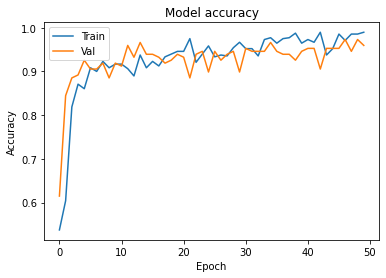

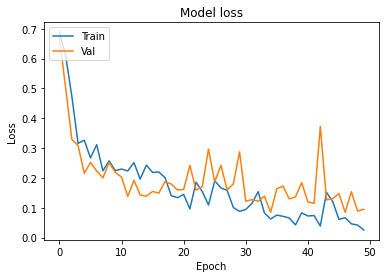

5/5 [==============================] - 2s 444ms/step - loss: 0.0294 - accuracy: 0.9937
Test accuracy: 0.9936708807945251


In [88]:
###### import matplotlib.pyplot as plt

# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()

# Evaluate the model on the test data
test_loss, test_acc = model.evaluate(test_generator)

# Print the test accuracy
print('Test accuracy:', test_acc)
